In [3]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

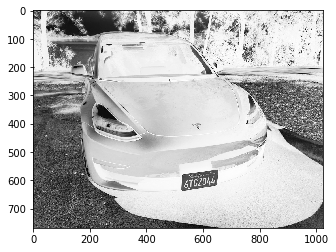

In [8]:
import cv2
import matplotlib.pyplot as mlt
import numpy as np
a = cv2.imread('6.jpg',0)
mlt.imshow(a,cmap = 'Greys')

In [4]:
import cv2
import numpy as np
import math
img = cv2.imread('.\\Desktop\\bien_xe.jpg',0)
kernel = np.ones((5,5),np.uint8)
img = cv2.dilate(img,kernel,iterations = 1)
img = cv2.erode(img,kernel,iterations = 1)
dst = cv2.Canny(img, 50, 200, None, 3)
cdst = cv2.cvtColor(dst, cv2.COLOR_GRAY2BGR)
cdstP = np.copy(cdst)

lines = cv2.HoughLines(dst, 1, np.pi / 180, 150, None, 0, 0)

if lines is not None:
    for i in range(0, len(lines)):
        rho = lines[i][0][0]
        theta = lines[i][0][1]
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
        cv2.line(cdst, pt1, pt2, (0,0,255), 3, 3)
# gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
# temp = cv2.HoughLines(img,1,np.pi / 180, 150)
# dilation = cv2.dilate(dilation,kernel,iterations = 1)
# erosion = cv2.erode(erosion,kernel,iterations = 1)


error: OpenCV(4.0.0) C:\projects\opencv-python\opencv\modules\core\src\matrix.cpp:757: error: (-215:Assertion failed) dims <= 2 && step[0] > 0 in function 'cv::Mat::locateROI'


In [ ]:
import matplotlib.pyplot as plt
cdst = cv2.dilate(cdst,kernel,iterations = 1)
plt.imshow(cdst)

In [ ]:
findEmailDomain = lambda a: a[:(a[::-1].find('@'))]
findEmailDomain("dcnkjana@example.com")

In [ ]:
pylab.rcParams['savefig.dpi'] = 100 # default 72
%config InlineBackend.figure_formats=['svg'] # SVG inline viewing

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as mlt
img_path = '6.jpg'
image = cv2.imread(img_path,0)
mlt.imshow(image, cmap = 'Greys')

In [ ]:
hist,bins = np.histogram(image.flatten(),256,[0,255]) 
x = np.arange(256) 
mlt.stem(x,hist)
mlt.xlim([0,255])
mlt.show()

In [ ]:
image = cv2.equalizeHist(closing)
res = np.hstack((image,equ))
mlt.imshow(image,cmap = 'Greys')

In [ ]:
ret, img = cv2.threshold(image,150,255,cv2.THRESH_BINARY_INV)
mlt.imshow(img,cmap = 'Greys')

In [ ]:
temp = np.array([[1,2,3,4],[1,2,3,4],[4,3,2,1]])
print(temp.flatten())

In [ ]:
kernel = np.ones((8,8),np.uint8)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
mlt.imshow(closing, cmap ='Greys')

In [ ]:
# a = cv2.bitwise_not(img)
b = cv2.imread(img_path)
ret, img = cv2.threshold(image,150,255,cv2.THRESH_BINARY_INV)
contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# print(contours[0][0,0,0])
for contour in contours:
    (x,y,w,h) = cv2.boundingRect(contour)
#     print(x,y,w,h)
    cv2.rectangle(b, (x,y), (x+w,y+h), (255,255,0), 6)
mlt.imshow(b,cmap='Greys')

In [5]:
def findLargestArea(longList):
    biggest_A = 0
    for contour in longList:
        x,y,w,h = cv2.boundingRect(contour)
        if x==0 and y==0:
            continue
        A = w*h
        if (A > biggest_A):
            license_plate = (x,y,w,h)
            biggest_A = A
    return license_plate
            

In [ ]:
temp = findLargestArea(contours)
print(temp)
img_path = '.\\Desktop\\bien_xe.jpg'
b = cv2.imread(img_path)
cv2.rectangle(b, (temp[0],temp[1]), (temp[0]+temp[2],temp[1]+temp[3]), (255,0,0), 3)
mlt.imshow(b)
    

In [ ]:
a = image[3:100,3:100]
mlt.imshow(a,cmap = 'Greys')

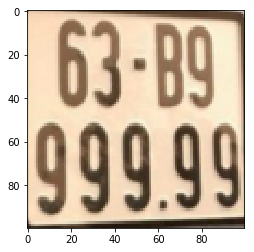

In [30]:
import cv2
from matplotlib import pyplot as mlt
import numpy as np
from PIL import Image

def findLargestArea(longList):
    biggest_A = 0
    for contour in longList:
        x,y,w,h = cv2.boundingRect(contour)
        if x==0 and y==0:
            continue
        A = w*h
        if (A > biggest_A):
            license_plate = (x,y,w,h)
            biggest_A = A
    return license_plate
def findLicensePlate(img_path):
    '''
    Input:
    + img_path: path of image in your computer
    Output: an 100x100 pixels RGB picture of license plate in your picture
    '''
    image = cv2.imread(img_path)
    gray =  cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
#     gray = cv2.imread(img_path, 0)
    ret, img = cv2.threshold(gray,150,255,cv2.THRESH_BINARY_INV)
#     mlt.imshow(gray)
    kernel = np.ones((8,8),np.uint8)
    closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
    contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    temp = findLargestArea(contours)
    license_loc = image[temp[1]:(temp[1]+temp[3]),temp[0]:(temp[0]+temp[2])]
    image = Image.fromarray(license_loc)
    liPlate = image.resize((100, 100), Image.BILINEAR) 
    return liPlate
#     print(temp)
#     cv2.rectangle(image, (temp[0],temp[1]), (temp[0]+temp[2],temp[1]+temp[3]), (255,0,0), 5)
#     mlt.imshow(image)
#     return contours
license = findLicensePlate('bien_xe.jpg')
# image = Image.fromarray(license)
# im2 = image.resize((100, 100), Image.BILINEAR) 
mlt.imshow(license)
# mlt.imshow(findLicensePlate('2.jpg'))

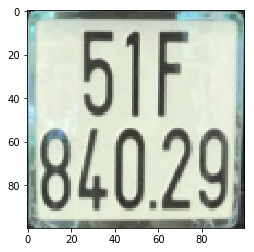

In [21]:
from PIL import Image
# license
# image = Image.open('2.jpg')
image = Image.fromarray(license)
im2 = image.resize((100, 100), Image.BILINEAR) 
mlt.imshow(im2)

In [37]:
import urllib as u

car_list = u.request.urlopen('https://raw.githubusercontent.com/Deevoluation/ALPR/master/data_set_urls.txt')
file = car_list.read()
file = str(file)
print(file)

b'www.numberplates.com/images/gallery/Y5AVE_110112.jpg\nwww.numberplates.com/images/gallery/3fyy_111111.jpg\nwww.numberplates.com/images/gallery/jea1s_121211.jpg\nwww.numberplates.com/images/gallery/jon155_111111.jpg\nwww.numberplates.com/images/gallery/baz21_111111.jpg\nwww.numberplates.com/images/gallery/wbx360_101111.jpg\nwww.numberplates.com/images/gallery/b11ssp_101111.jpg\nwww.numberplates.com/images/gallery/pj142_111111.jpg\nwww.numberplates.com/images/gallery/p18eau_101111.jpg\nwww.numberplates.com/images/gallery/mhd3_111111.jpg\nwww.numberplates.com/images/gallery/h6rth_101111.jpg\nwww.numberplates.com/images/gallery/49y_121211.jpg\nwww.numberplates.com/images/gallery/64sm_121211.jpg\nwww.numberplates.com/images/gallery/29dt_121211.jpg\nwww.numberplates.com/images/gallery/b16por_111111.jpg\nwww.numberplates.com/images/gallery/h1jet_111111.jpg\nwww.numberplates.com/images/gallery/p4fer_111111.jpg\nwww.numberplates.com/images/gallery/pms1m_101111.jpg\nwww.numberplates.com/images

In [46]:
file_list = file.split("\\n")



www.numberplates.com/images/gallery/m4tch.jpg


In [47]:
del file_list[len(file_list)-1]
del file_list[0]

In [68]:
import requests
# img_path= u.request.urlopen('https://www.regtransfers.co.uk/images/gallery/x4kyx_210809.jpg')
# requests = u.Request('https://www.regtransfers.co.uk/images/gallery/x4kyx_210809.jpg')
# print(str(img_path))
with open('pic1.jpg', 'wb') as handle:
    response = requests.get('https://www.regtransfers.co.uk/images/gallery/x4kyx_210809.jpg', stream=True)
    for block in response.iter_content(300000):
        if not block:
            break

        handle.write(block)
# print(response)
# a = cv2.imread(response)
# mlt.imshow(a)